In [1]:
install.packages("cowplot")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# Check 'weight' Aesthetic

In [2]:
library(ggplot2)
library(cowplot)

In [3]:
options(repr.plot.width = 18, repr.plot.height = 6)

In [4]:
cut_last <- function (data) {
    head(data, -1)
}

replace_na_by_0 <- function (data) {
    data[is.na(data)] = 0
    data
}

In [5]:
get_plot <- function (layer, data) {
    plot_grid(
        ggplot(cut_last(data)) + layer + ggtitle("Filtered data (excluded None)"),
        ggplot(replace_na_by_0(data)) + layer + ggtitle("0 instead of None"),
        ggplot(data) + layer + ggtitle("Data as is (with None)"),
        ncol = 3
    )
}

## `geom_bar()`

In [6]:
get_bar_data <- function () {
    data.frame(
        v = c("A", "B", "C"),
        w = c(1, 2, NA)
    )
}

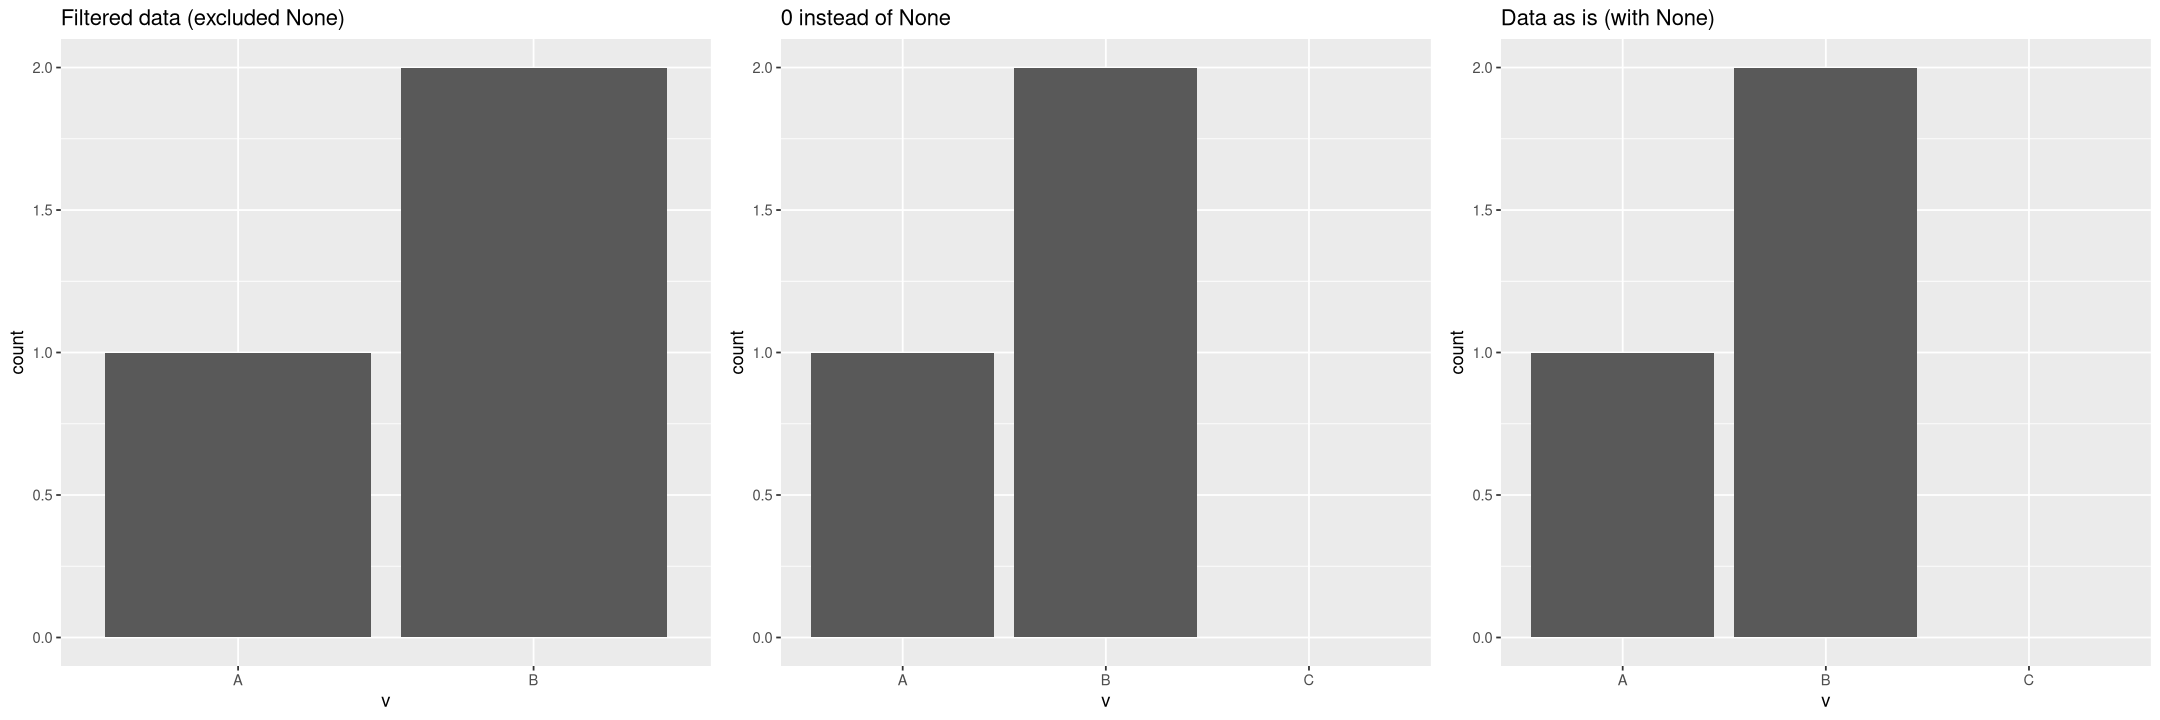

In [7]:
get_plot(geom_bar(aes(x = v, weight = w)), get_bar_data())

## `geom_histogram()`

In [8]:
get_hist_data <- function () {
    data.frame(
        v = c(1, 2, 3),
        w = c(1, 2, NA)
    )
}

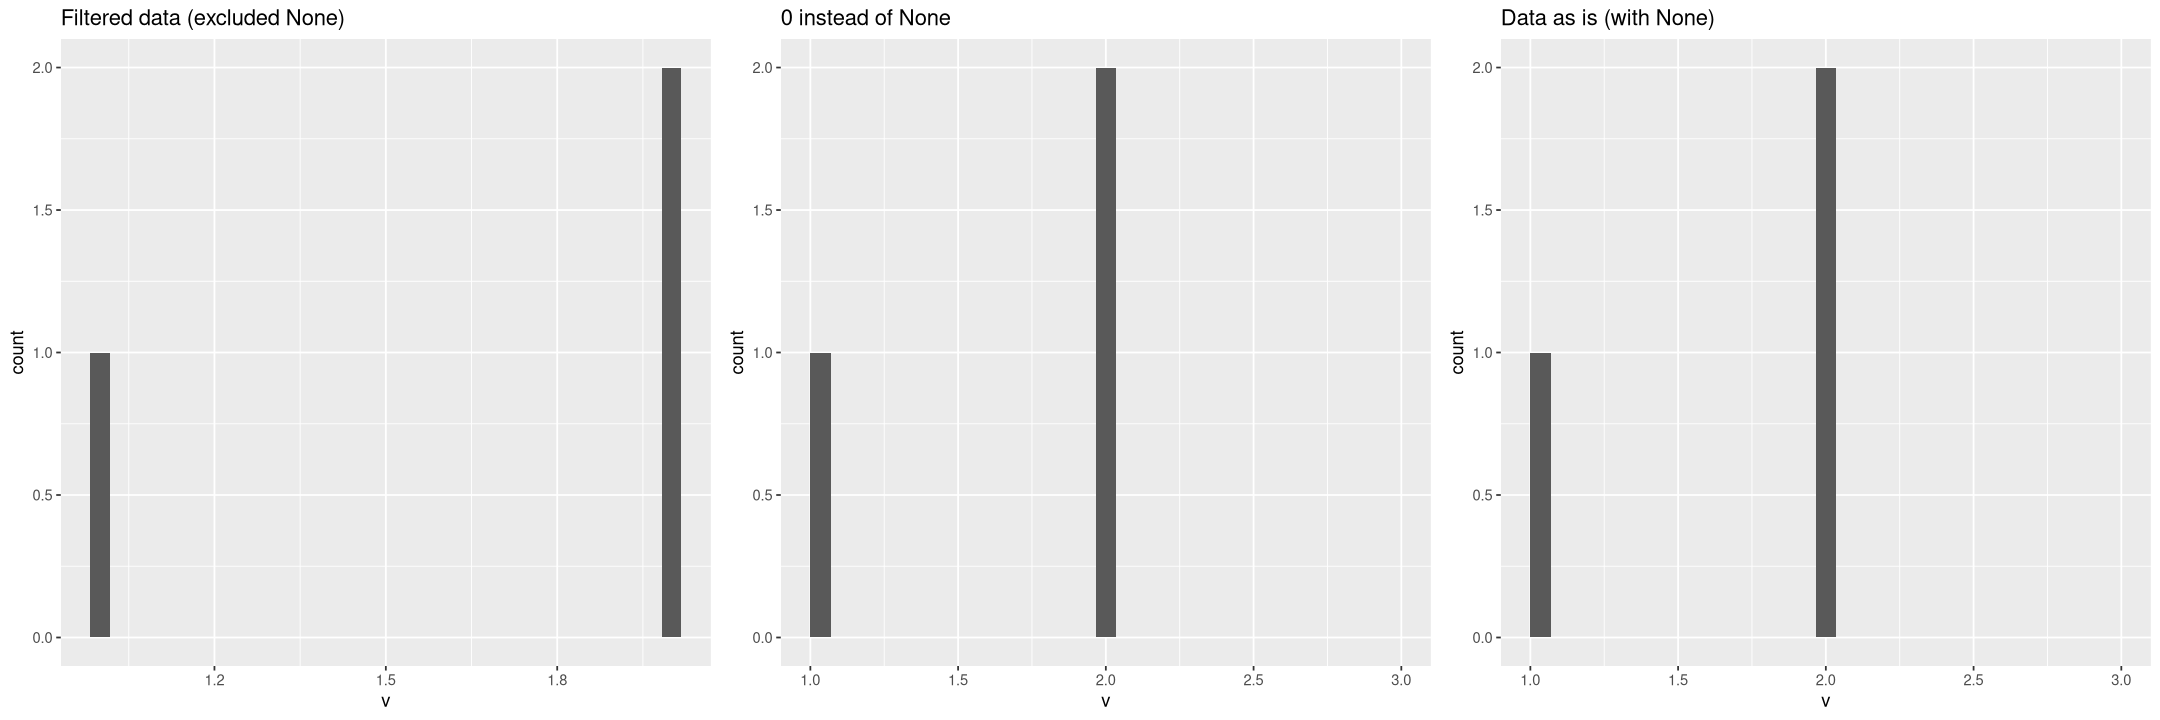

In [9]:
get_plot(geom_histogram(aes(x = v, weight = w), bins = 30), get_hist_data())

## `geom_density()`

In [10]:
get_dens_data <- function () {
    data.frame(
        v = c(1, 2, 3),
        w = c(1, 2, NA)
    )
}

Warning message:
“Computation failed in `stat_density()`.
Caused by error in `density.default()`:
! 'weights' must all be finite”


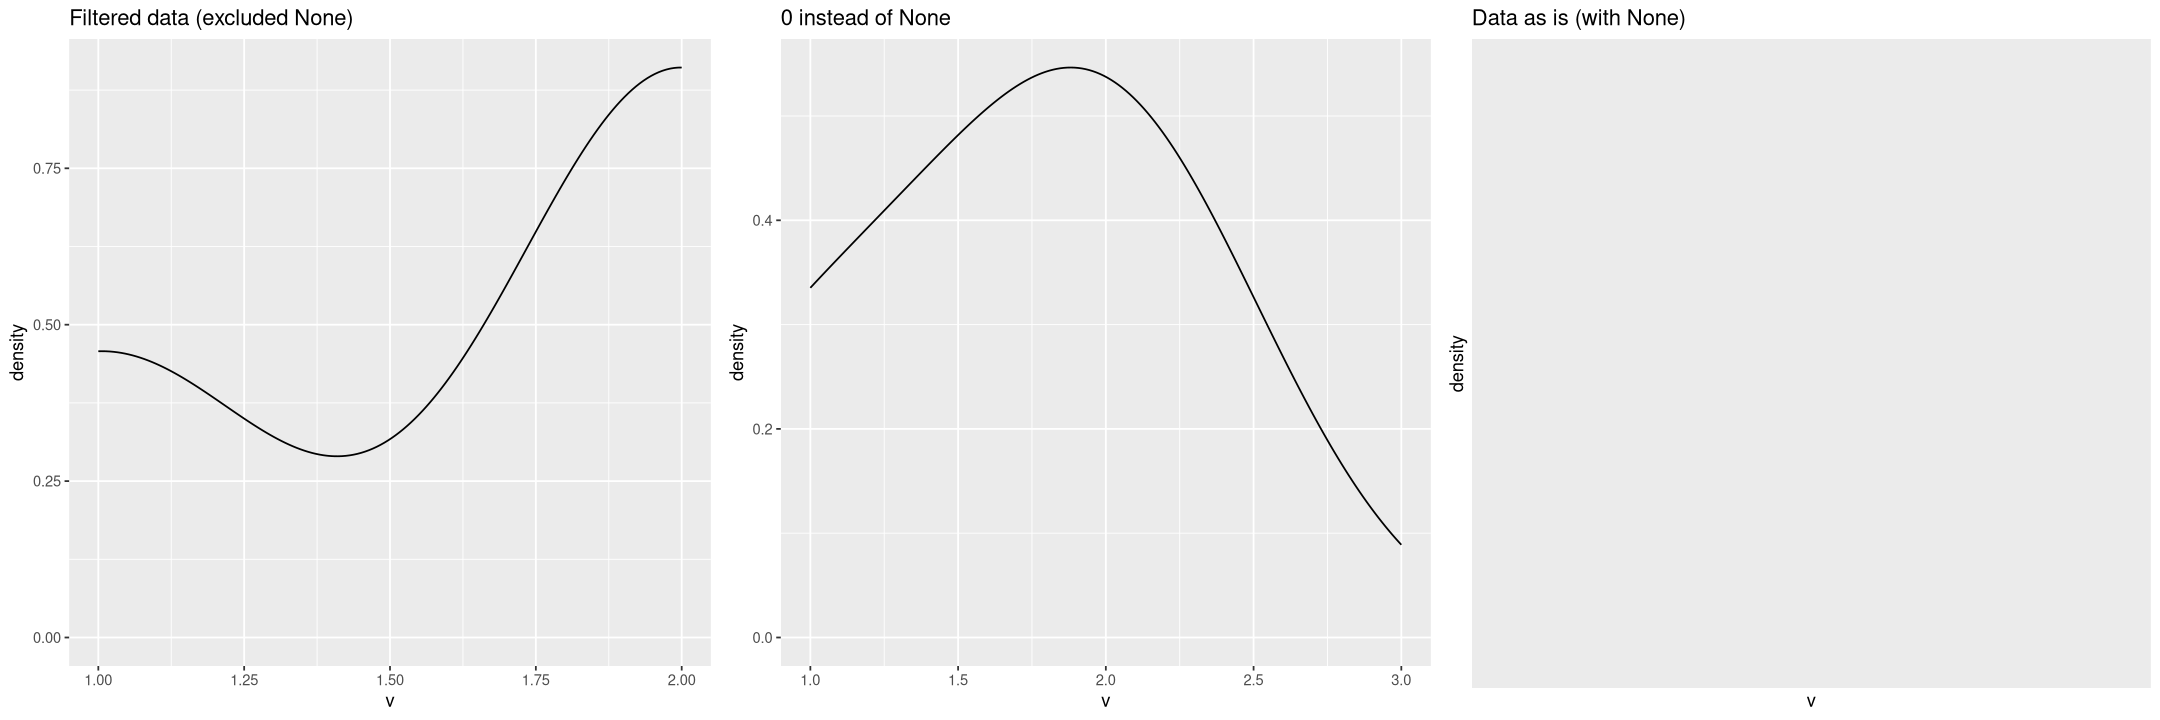

In [11]:
get_plot(geom_density(aes(x = v, weight = w)), get_dens_data())

## `geom_violin()`

Warning message:
“Removed 1 row containing non-finite outside the scale range
(`stat_ydensity()`).”


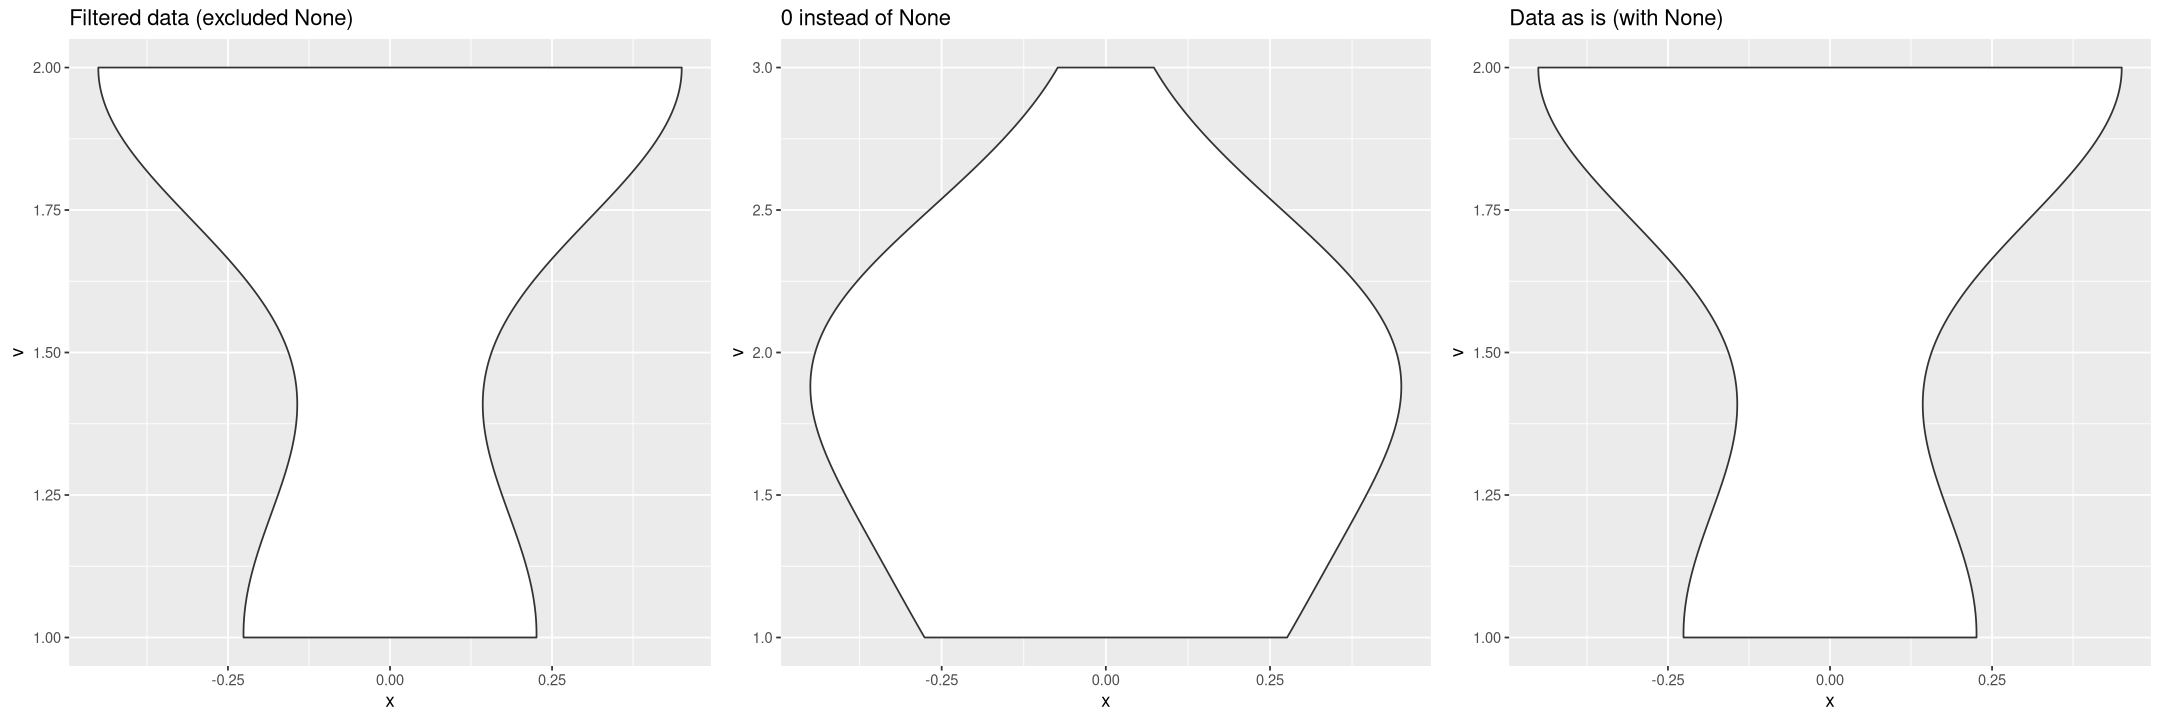

In [12]:
get_plot(geom_violin(aes(x = 0, y = v, weight = w)), get_dens_data())

## `geom_bin2d()`

In [13]:
get_bin2d_data <- function () {
    data.frame(
        x = c(0, 0, 1, 1),
        y = c(0, 1, 0, 1),
        w = c(2, 1, 1, NA)
    )
}

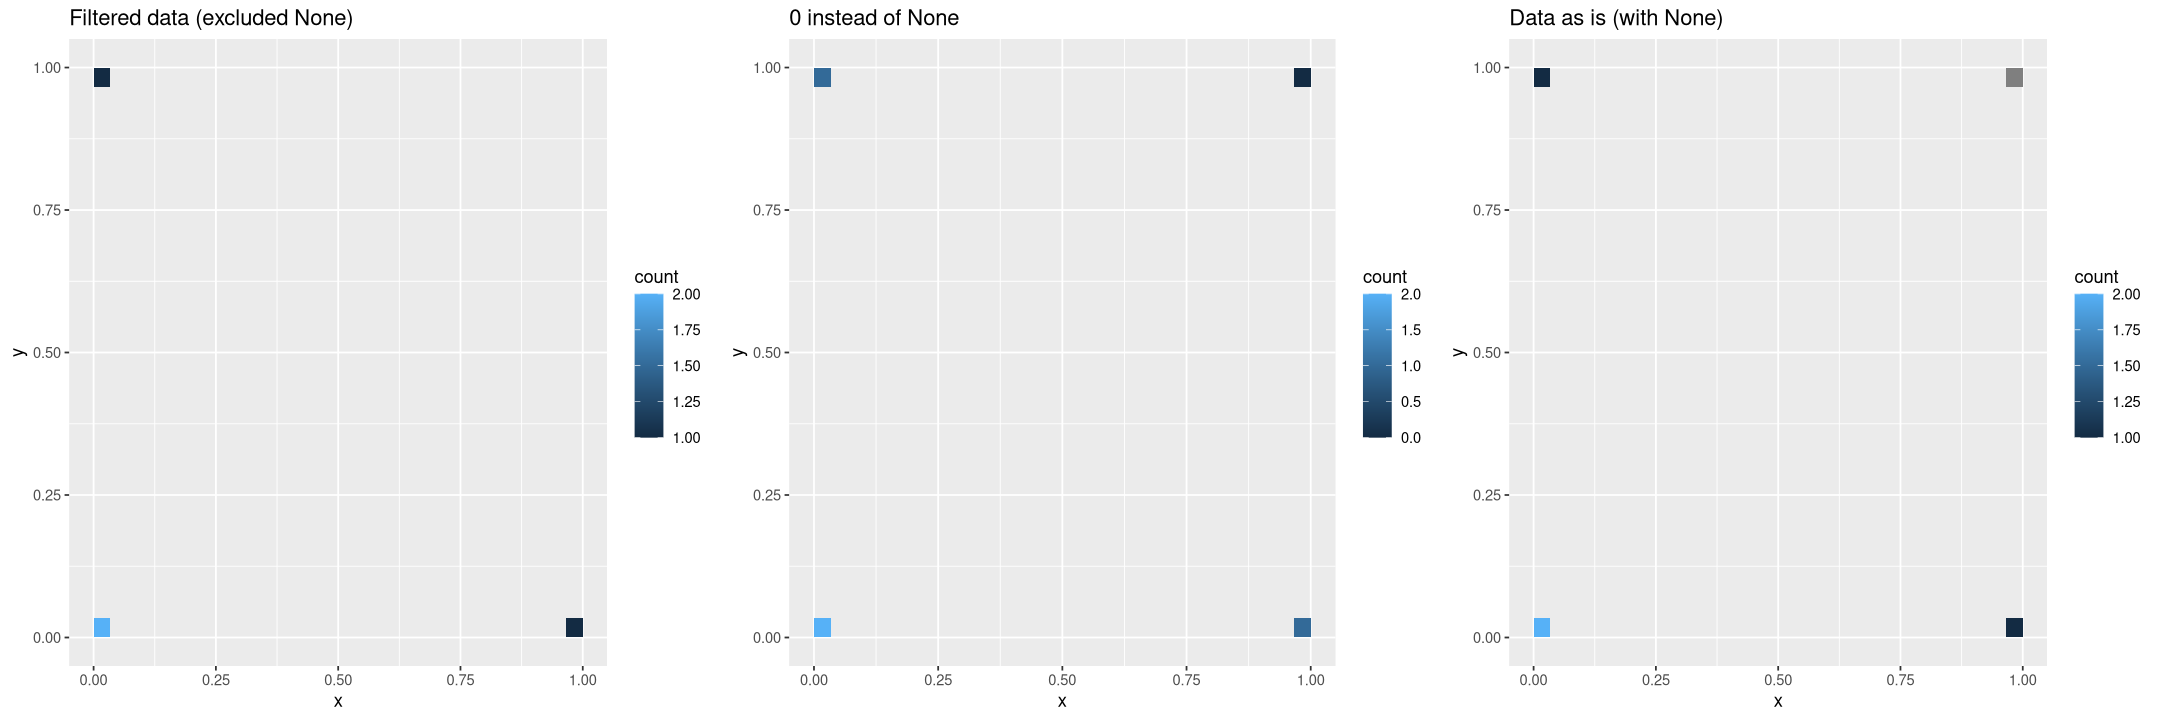

In [14]:
get_plot(geom_bin2d(aes(x, y, weight = w)), get_bin2d_data())

## `geom_density2d()`

In [15]:
get_dens2d_data <- function () {
    data.frame(
        x = c(0, 0, 1, 1),
        y = c(0, 1, 0, 1),
        w = c(2, 1, 1, NA)
    )
}

Warning message in geom_density2d(aes(x, y, weight = w)):
“Ignoring unknown aesthetics: weight”
Warning message:
“The following aesthetics were dropped during statistical transformation:
weight.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation:
weight.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation:
weight.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


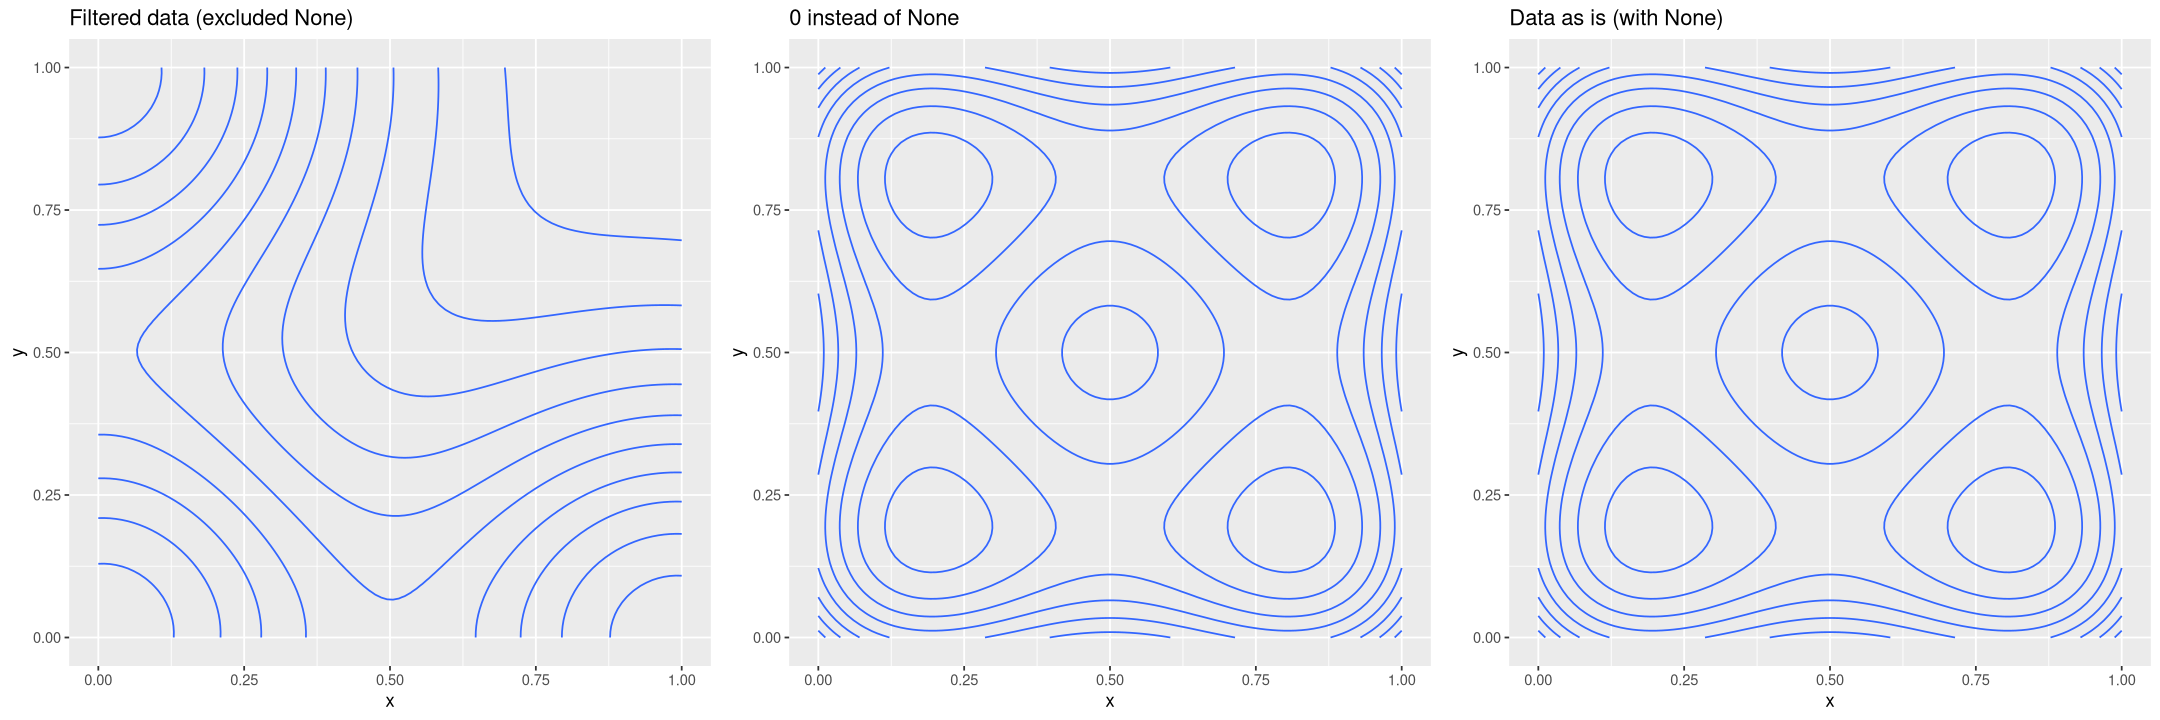

In [16]:
get_plot(geom_density2d(aes(x, y, weight = w)), get_dens2d_data())